# Housing Price Prediction

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
data = pd.read_csv('Raw_Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<Axes: ylabel='Frequency'>

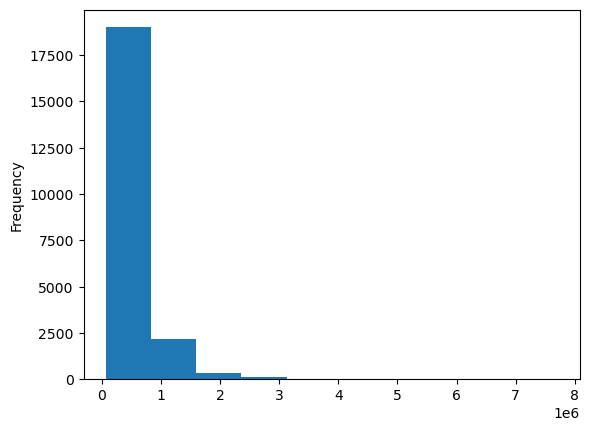

In [4]:
#distribution of target variable
data['Sale Price'].plot.hist()

In [5]:
# checking quantiles
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
q1, q3

(321950.0, 645000.0)

In [6]:
#calculating iqr
iqr = q3 - q1
iqr

323050.0

In [7]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [8]:
# imputing outliers
def limit_imputer(value):
  if value > upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [9]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [10]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<Axes: ylabel='Frequency'>

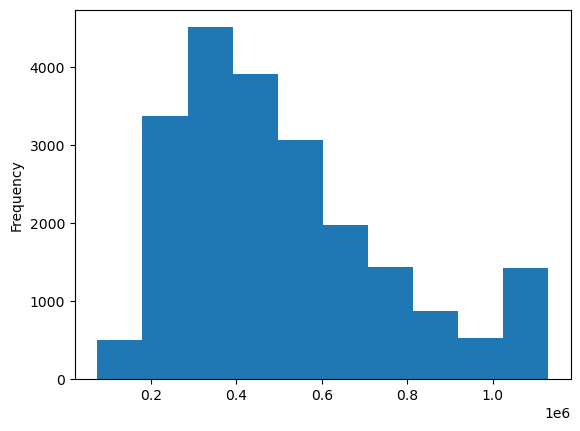

In [11]:
data['Sale Price'].plot.hist()

In [12]:
#checking missing values
data.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [13]:
data['Sale Price'].dropna(inplace=True)
data["Sale Price"].isnull().sum()

4

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [15]:
#isolating numerical variables
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']

In [16]:
#imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

# zipcode transform

In [18]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))

In [19]:
data['Zipcode'].shape

(21613,)

In [20]:
column = data["Zipcode"].values.reshape(-1,1)
column.shape

(21613, 1)

In [21]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

# Other transformations

In [23]:
data['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [24]:
# converting from string to categorical
mapping = {'None' : "0",
           'Once' : '1',
           'Twice' : '2',
           'Thrice' : '3',
           'Four' : '4'}

data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [25]:
data['No of Times Visited'].unique()

array([nan, '3', '4', '2', '1'], dtype=object)

In [26]:
# new variable creation
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')

In [27]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [28]:
#manipulating datetime variable
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [29]:
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                                     abs(data['Purchase Year'] - 
                                                        data['Renovated Year']), 0)

In [30]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [31]:
# dropping redundant variables
data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [32]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


# zipcodebin

In [33]:
data.drop( columns = 'ID', inplace = True)

In [34]:
data['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [35]:
data['Condition of the House'].value_counts()

Condition of the House
Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

<Axes: xlabel='Condition of the House'>

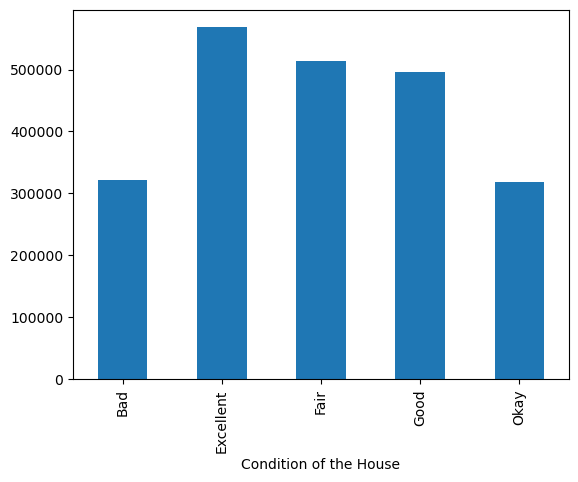

In [36]:
data.groupby('Condition of the House')['Sale Price'].mean().plot(kind = 'bar')

<Axes: xlabel='Condition of the House'>

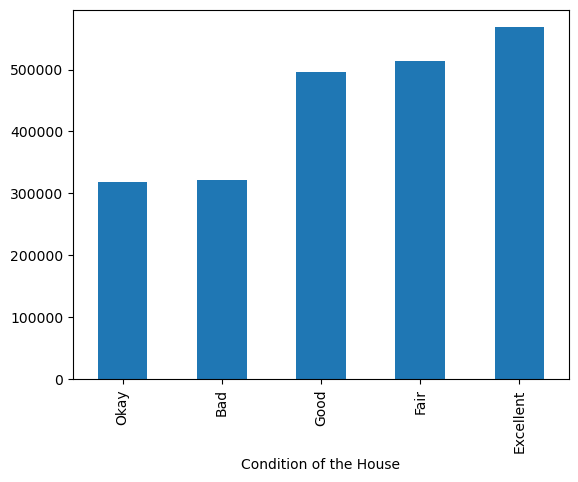

In [37]:
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Waterfront View'>

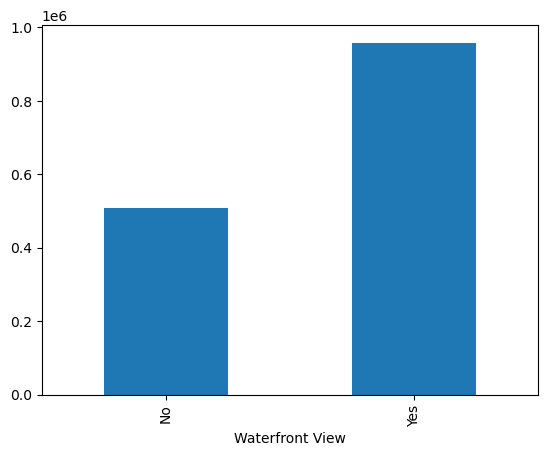

In [38]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Ever Renovated'>

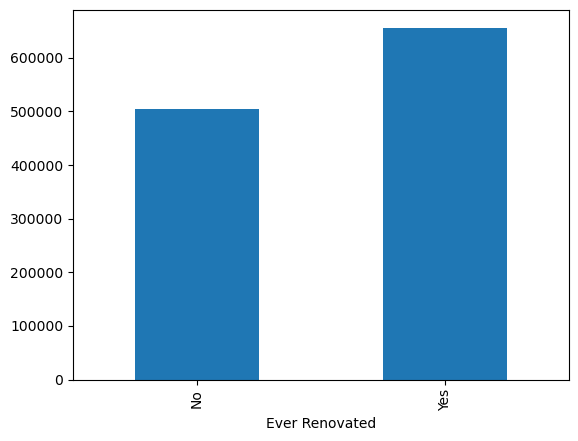

In [39]:
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')

<Axes: xlabel='Zipcode'>

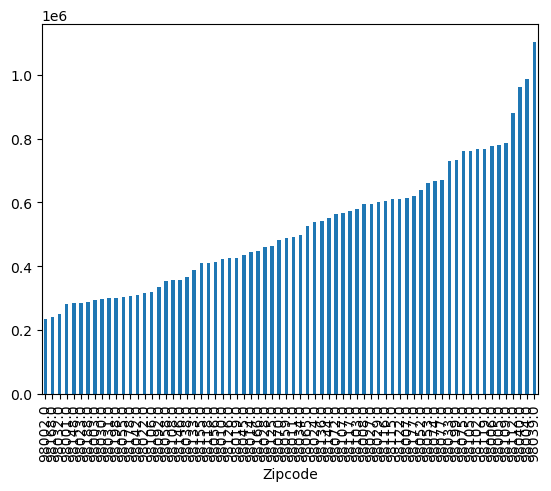

In [40]:
data.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

# Linear Regression


In [41]:
data.dropna(inplace=True)
X = data.drop(columns=['Sale Price'])
Y = data['Sale Price']

## variable transformation

In [42]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var):
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [43]:
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [44]:
for i in numerical_columns:
  X[i] = pd.to_numeric(X[i])

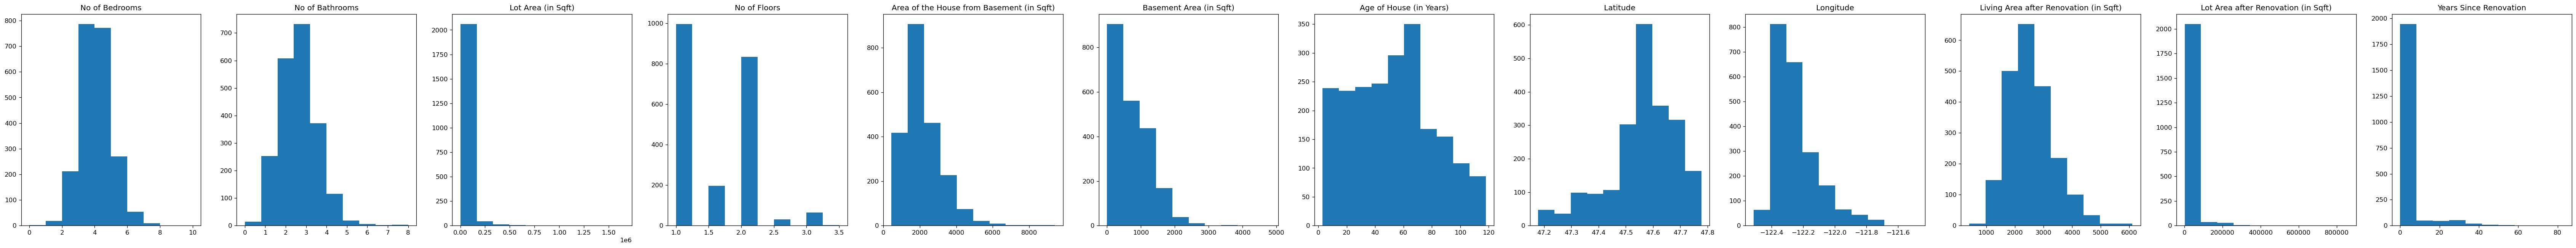

In [45]:
distribution(X, numerical_columns)

In [46]:
#removing right skew
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']


In [47]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

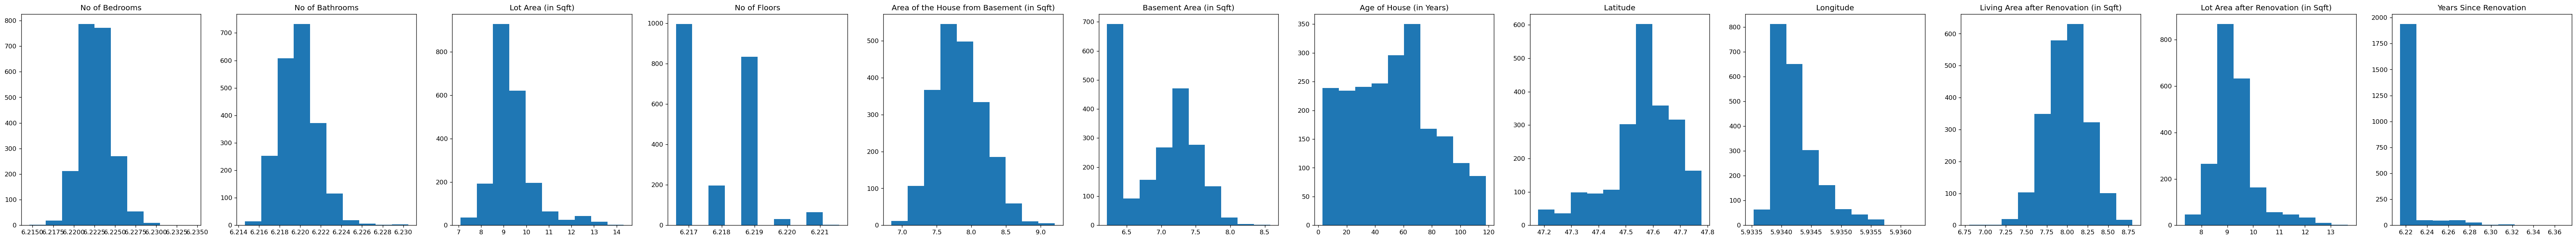

In [48]:
distribution(X, numerical_columns)

## Scaling the dataset

In [49]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
15,6.222576,6.220590,2950.0,8.612503,6.218600,No,3,Fair,9,7.816014,7.293018,39,98126.0,47.5714,5.933902,7.878534,8.411833,No,6.214608
21,6.220590,6.220093,3050.0,10.722540,6.216606,No,4,Fair,9,7.948032,7.106606,50,98040.0,47.5316,5.934278,8.435983,9.944438,No,6.214608
49,6.220590,6.219596,2753.0,11.089882,6.216606,Yes,2,Excellent,9,7.887959,6.992096,65,98070.0,47.4041,5.933700,8.064636,11.198393,No,6.214608
58,6.224558,6.221087,3250.0,9.605216,6.218600,No,4,Good,8,8.229511,6.214608,50,98008.0,47.5880,5.934587,8.149024,9.353921,No,6.214608
60,6.220590,6.219098,2150.0,9.986679,6.216606,No,3,Good,8,7.644919,6.966024,59,98166.0,47.4336,5.933997,8.029433,9.873028,No,6.214608


In [50]:
X["Waterfront View"] = X["Waterfront View"].map({    'No':0,
   'Yes':1
})


X['Condition of the House'] = X['Condition of the House'].map({'Bad':1,
                                                                     'Okay':2,
                                                                     'Fair':3,
                                                                     'Good':4,
                                                                     'Excellent':5
})

X['Ever Renovated'] = X['Ever Renovated'].map({
    'No':0,
    'Yes':1
})

X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
15,6.222576,6.220590,2950.0,8.612503,6.218600,0,3,3,9,7.816014,7.293018,39,98126.0,47.5714,5.933902,7.878534,8.411833,0,6.214608
21,6.220590,6.220093,3050.0,10.722540,6.216606,0,4,3,9,7.948032,7.106606,50,98040.0,47.5316,5.934278,8.435983,9.944438,0,6.214608
49,6.220590,6.219596,2753.0,11.089882,6.216606,1,2,5,9,7.887959,6.992096,65,98070.0,47.4041,5.933700,8.064636,11.198393,0,6.214608
58,6.224558,6.221087,3250.0,9.605216,6.218600,0,4,4,8,8.229511,6.214608,50,98008.0,47.5880,5.934587,8.149024,9.353921,0,6.214608
60,6.220590,6.219098,2150.0,9.986679,6.216606,0,3,4,8,7.644919,6.966024,59,98166.0,47.4336,5.933997,8.029433,9.873028,0,6.214608


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,0.406644,0.514205,0.094025,-0.808761,0.868848,-0.288307,0.668115,-0.726703,0.524488,-0.031485,0.692922,-0.469642,0.546499,0.060034,-0.869726,-0.447078,-1.084048,-0.333856,-0.283572
1,-0.599336,0.242388,0.174779,1.483717,-0.954506,-0.288307,1.753035,-0.726703,0.524488,0.344732,0.354902,-0.089318,-0.865842,-0.265145,0.130791,1.746295,0.808483,-0.333856,-0.283572
2,-0.599336,-0.029565,-0.065061,1.882820,-0.954506,3.468526,-0.416805,2.166486,0.524488,0.173540,0.147262,0.429304,-0.373165,-1.306860,-1.405368,0.285171,2.356926,-0.333856,-0.283572
3,1.410629,0.785887,0.336287,0.269786,0.868848,-0.288307,1.753035,0.719892,-0.272944,1.146873,-1.262554,-0.089318,-1.391364,0.195661,0.954878,0.617207,0.079286,-0.333856,-0.283572
4,-0.599336,-0.301653,-0.552009,0.684231,-0.954506,-0.288307,0.668115,0.719892,-0.272944,-0.519059,0.099986,0.221855,1.203401,-1.065836,-0.616038,0.146657,0.720304,-0.333856,-0.283572


## Checking and Removing Multicollinearity

In [52]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
No of Bedrooms,1.000000,0.561738,0.551323,0.095643,0.158994,-0.085878,0.042205,-0.014730,0.326521,0.460759,0.362730,-0.189253,-0.138767,0.058851,0.144605,0.368516,0.068314,0.009343,-0.004171
No of Bathrooms,0.561738,1.000000,0.789559,0.155563,0.445689,0.046909,0.167627,-0.096720,0.527897,0.724680,0.342114,-0.430769,-0.196656,0.100610,0.191780,0.495722,0.130730,0.084855,0.043296
Flat Area (in Sqft),0.551323,0.789559,1.000000,0.277965,0.363156,0.079187,0.211449,-0.070918,0.579328,0.844901,0.476289,-0.375349,-0.231030,0.110293,0.213613,0.643606,0.250417,0.062953,0.027058
Lot Area (in Sqft),0.095643,0.155563,0.277965,1.000000,-0.092774,0.136284,0.144286,0.019186,0.115192,0.297229,-0.011595,-0.177122,-0.326060,-0.348105,0.409050,0.260929,0.904830,-0.027803,-0.002100
No of Floors,0.158994,0.445689,0.363156,-0.092774,1.000000,0.061789,0.107334,-0.180756,0.398252,0.590306,-0.218371,-0.310153,-0.057011,0.094647,0.091608,0.169291,-0.079682,0.094307,0.084835
Waterfront View,-0.085878,0.046909,0.079187,0.136284,0.061789,1.000000,0.432492,0.013091,0.039787,0.074250,-0.011199,0.032162,0.018015,-0.062865,-0.061048,0.035677,0.170210,0.151062,0.184377
No of Times Visited,0.042205,0.167627,0.211449,0.144286,0.107334,0.432492,1.000000,0.018531,0.185209,0.183676,0.095564,-0.040672,0.002578,-0.025565,0.027936,0.198486,0.150574,0.090415,0.092504
Condition of the House,-0.014730,-0.096720,-0.070918,0.019186,-0.180756,0.013091,0.018531,1.000000,-0.127202,-0.157839,0.136232,0.351302,0.023644,-0.036080,-0.120679,-0.036314,0.015865,-0.106571,-0.032633
Overall Grade,0.326521,0.527897,0.579328,0.115192,0.398252,0.039787,0.185209,-0.127202,1.000000,0.646213,0.206355,-0.438361,-0.212724,0.136582,0.165586,0.574801,0.104233,0.011367,-0.043232
Area of the House from Basement (in Sqft),0.460759,0.724680,0.844901,0.297229,0.590306,0.074250,0.183676,-0.157839,0.646213,1.000000,0.008088,-0.446863,-0.253136,0.050783,0.291129,0.605720,0.272744,0.069759,0.053235


In [53]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'Living Area after Renovation (in Sqft)'],
  ['Area of the House from Basement (in Sqft)', 'No of Bathrooms'],
  ['Area of the House from Basem

### Calculating VIF

In [54]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                1.706547
No of Bathrooms                               3.370109
Flat Area (in Sqft)                          18.659261
Lot Area (in Sqft)                            6.077964
No of Floors                                  2.168943
Waterfront View                               1.335545
No of Times Visited                           1.323149
Condition of the House                        1.305965
Overall Grade                                 2.451999
Area of the House from Basement (in Sqft)    19.470052
Basement Area (in Sqft)                       5.913015
Age of House (in Years)                       2.231699
Zipcode                                       1.688610
Latitude                                      1.305917
Longitude                                     1.898815
Living Area after Renovation (in Sqft)        2.280303
Lot Area after Renovation (in Sqft)           5.907014
Ever Renovated                                4.014455
Years Sinc

In [55]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [56]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,0.406644,0.514205,0.094025,0.868848,-0.288307,0.668115,-0.726703,0.524488,0.692922,-0.469642,0.546499,0.060034,-0.869726,-0.447078,-1.084048,-0.333856,-0.283572
1,-0.599336,0.242388,0.174779,-0.954506,-0.288307,1.753035,-0.726703,0.524488,0.354902,-0.089318,-0.865842,-0.265145,0.130791,1.746295,0.808483,-0.333856,-0.283572
2,-0.599336,-0.029565,-0.065061,-0.954506,3.468526,-0.416805,2.166486,0.524488,0.147262,0.429304,-0.373165,-1.306860,-1.405368,0.285171,2.356926,-0.333856,-0.283572
3,1.410629,0.785887,0.336287,0.868848,-0.288307,1.753035,0.719892,-0.272944,-1.262554,-0.089318,-1.391364,0.195661,0.954878,0.617207,0.079286,-0.333856,-0.283572
4,-0.599336,-0.301653,-0.552009,-0.954506,-0.288307,0.668115,0.719892,-0.272944,0.099986,0.221855,1.203401,-1.065836,-0.616038,0.146657,0.720304,-0.333856,-0.283572


### Remaining Columns

In [57]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.644888
 No of Bathrooms                           3.355702
 Flat Area (in Sqft)                       4.557772
 No of Floors                              1.940162
 Waterfront View                           1.329957
 No of Times Visited                       1.320050
 Condition of the House                    1.302130
 Overall Grade                             2.035517
 Basement Area (in Sqft)                   1.985577
 Age of House (in Years)                   2.196513
 Zipcode                                   1.676318
 Latitude                                  1.280427
 Longitude                                 1.885559
 Living Area after Renovation (in Sqft)    2.196261
 Lot Area after Renovation (in Sqft)       1.624912
 Ever Renovated                            3.999803
 Years Since Renovation                    3.761973
 dtype: float64,
 17)

In [58]:
X = vif_data[:]

## Train/Test set

In [59]:
Y = data['Sale Price']

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1486, 17), (638, 17), (1486,), (638,))

## training model

In [62]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize = True)
# lr.fit(x_train, y_train)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline that first scales the data and then fits Linear Regression
lr = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model
lr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [65]:
# lr.coef_
print("Coefficients:", lr.named_steps['linearregression'].coef_)


Coefficients: [-13336.89292271  25384.98011343  65022.25166013  16156.00977757
  25342.41607038  26096.06872115  28258.3780303   90480.49956606
  -2904.23070435  33919.21902241 -32023.03333761  86705.78897678
 -25365.49985516  58905.64081914  -7865.69659689  30642.34593863
 -18262.44798192]


In [64]:
predictions = lr.predict(x_test)

In [66]:
lr.score(x_test, y_test)

0.704752993773712

### 1. Residuals

In [67]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [68]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

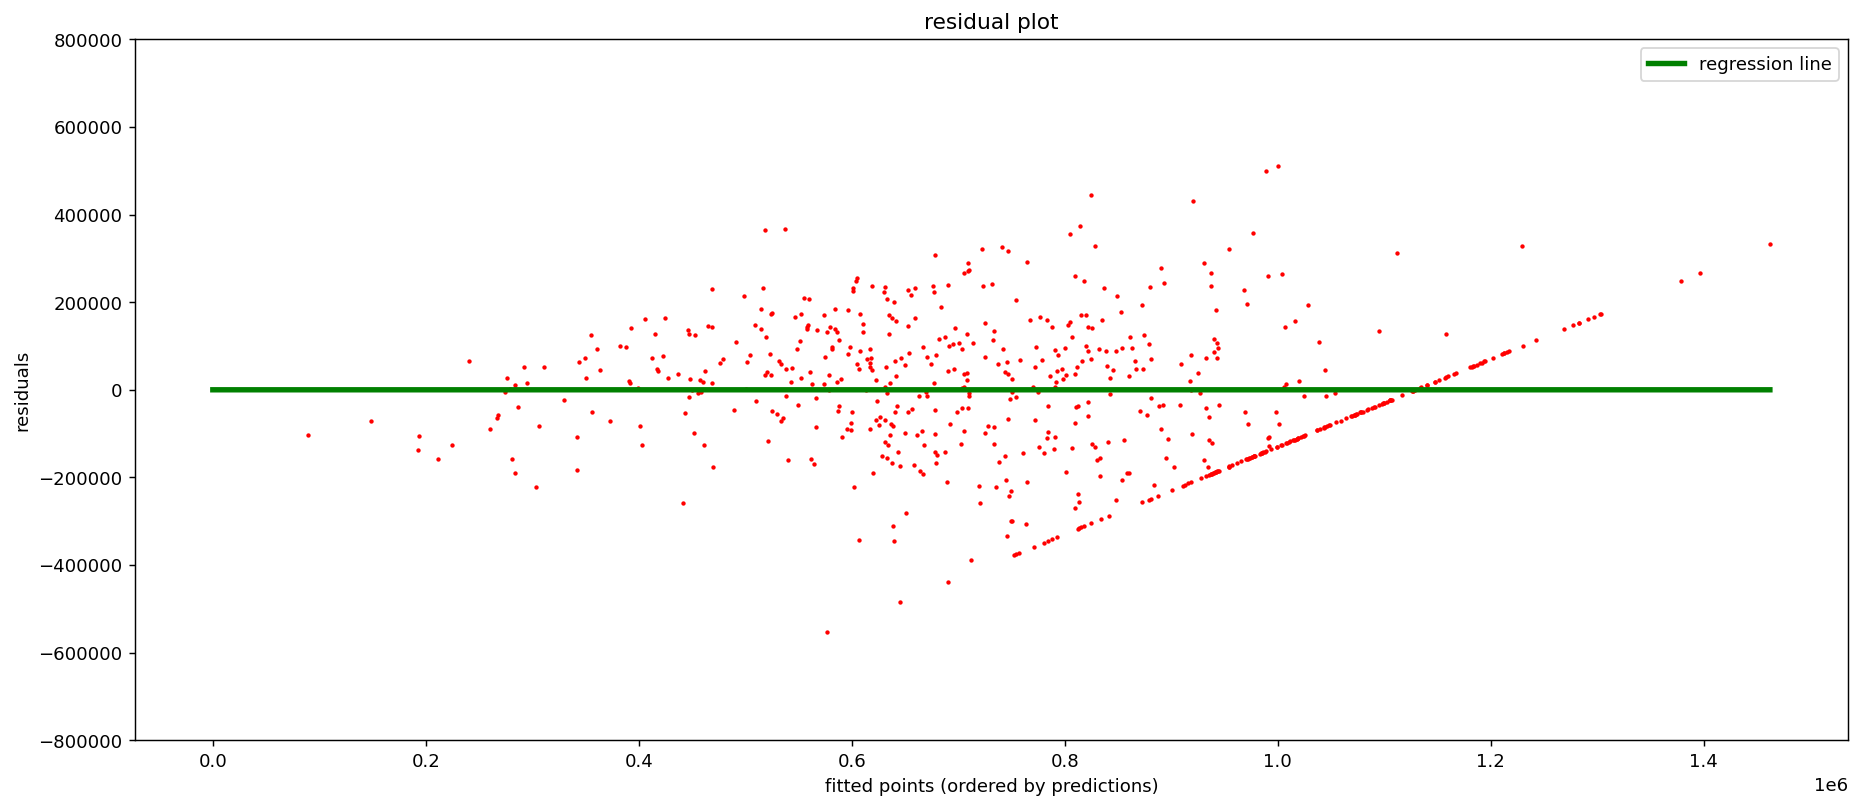

In [69]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## 2. Distribution of errors

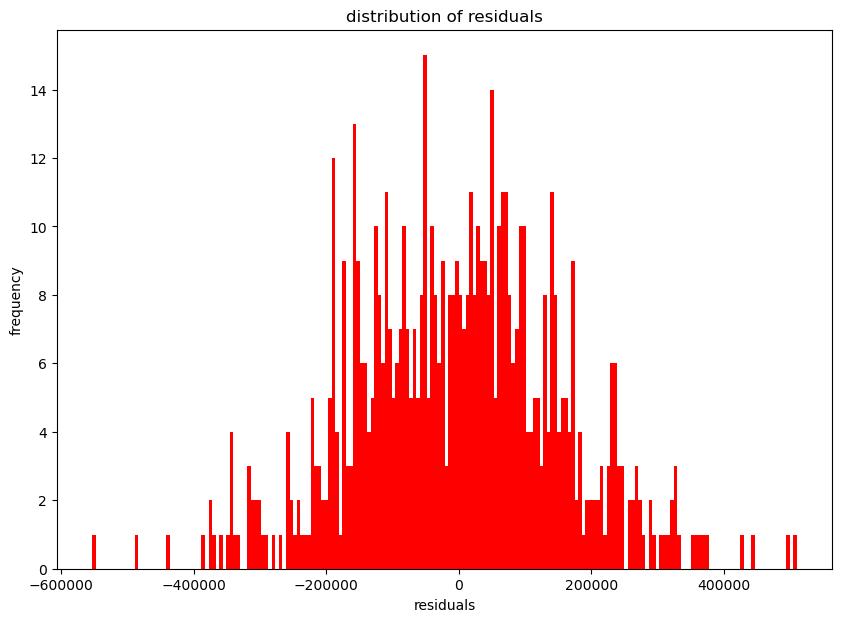

In [70]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model Coefficients

In [73]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients':  lr.named_steps['linearregression'].coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


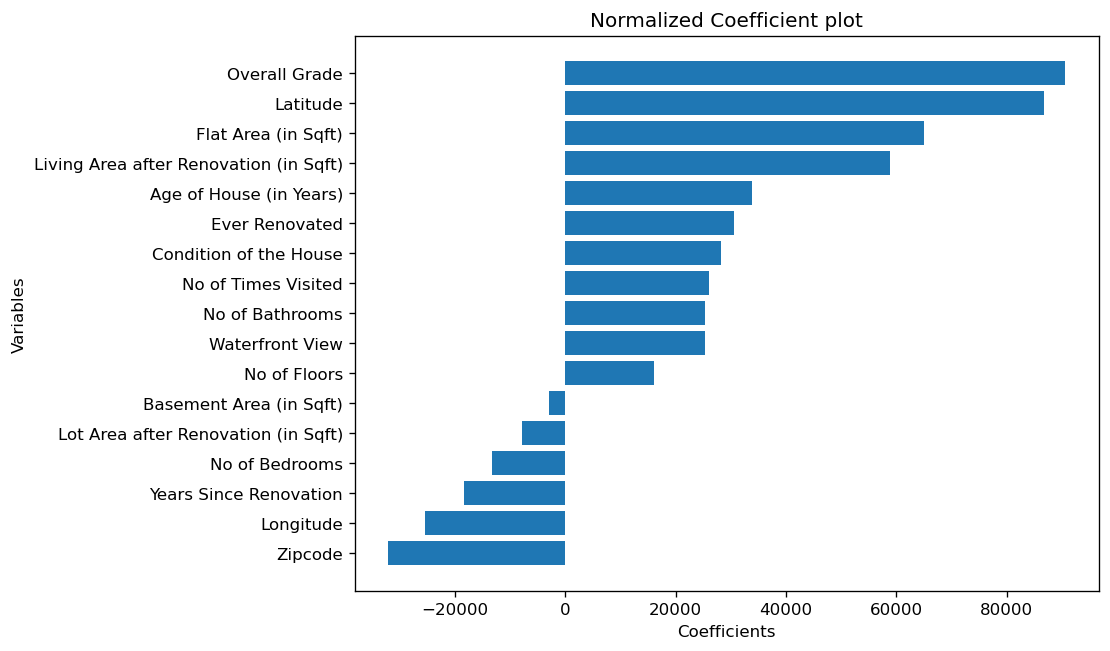

In [74]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()